# Milestone 2 : Data gathering, preprocessing and basis statistics



In [1]:
# Imports
import numpy as np
import seaborn as sns
import pandas as pd
import os
import fnmatch
import glob2
import glob
from matplotlib import pyplot
import numpy as np

# Constants
DATA_FOLDER = 'Data/'

In [2]:
#Getting all the data in a DataFrame
df = pd.DataFrame(glob.glob(DATA_FOLDER + "/*/*.mid"))

#Splitting into a more readable format
df['genre'] = df[0].str.split('\\', expand=True)[1]
df['name_artist'] = df[0].str.split('\\', expand=True)[2].map(lambda x: str(x)[:-4])


display(df.head())

,0,genre,name_artist
0,Data\blues\all_blues-Miles-Davis_dz.mid,blues,all_blues-Miles-Davis_dz
1,Data\blues\between_the_sheets-isley-bros_mlod.mid,blues,between_the_sheets-isley-bros_mlod
2,Data\blues\budapest-George Ezra-kar_rt.mid,blues,budapest-George Ezra-kar_rt
3,Data\blues\dont_say_nothin_bad_about_my_baby-k...,blues,dont_say_nothin_bad_about_my_baby-kar_gr
4,Data\blues\for_your_precious_love_fd.mid,blues,for_your_precious_love_fd


One can see that the song's name and the artist's name are separate with a '-'. We must also get rid of the 

In [3]:
#Splitting
df['name'] = df['name_artist'].str.split('-', expand=True)[0]
df['artist'] = df['name_artist'].str.partition('-', expand=True)[2]
df['extension?'] = df['artist'].str.partition('_', expand=True)[2]
df['artist'] = df['artist'].str.split('_', expand=True)[0]


In [4]:
#Dropping the raw data (in a separate cell to avoid dropping it twice when printing and have errors)
df = df.drop([0, 'name_artist'], axis=1)

In [5]:
#displaying results
display(df.head(10))

,genre,name,artist,extension?
0,blues,all_blues,Miles-Davis,dz
1,blues,between_the_sheets,isley-bros,mlod
2,blues,budapest,George Ezra-kar,rt
3,blues,dont_say_nothin_bad_about_my_baby,kar,gr
4,blues,for_your_precious_love_fd,,
5,blues,ghost,Ella Henderson-kar,gc9
6,blues,good_morning_little_school_girl,kar,gc9
7,blues,im_your_puppet,kar,gc9
8,blues,look what youve done for me,Al Green-kar,gc9
9,blues,my_lovers_prayer,kar,gc9


In [6]:
#Cleaning the data to get rid of songs with no artists
df['artist'] = df['artist'].replace('', np.nan).replace('kar', np.nan)
#df = df.dropna()
display(df.head())

,genre,name,artist,extension?
0,blues,all_blues,Miles-Davis,dz
1,blues,between_the_sheets,isley-bros,mlod
2,blues,budapest,George Ezra-kar,rt
3,blues,dont_say_nothin_bad_about_my_baby,NaN,gr
4,blues,for_your_precious_love_fd,NaN,


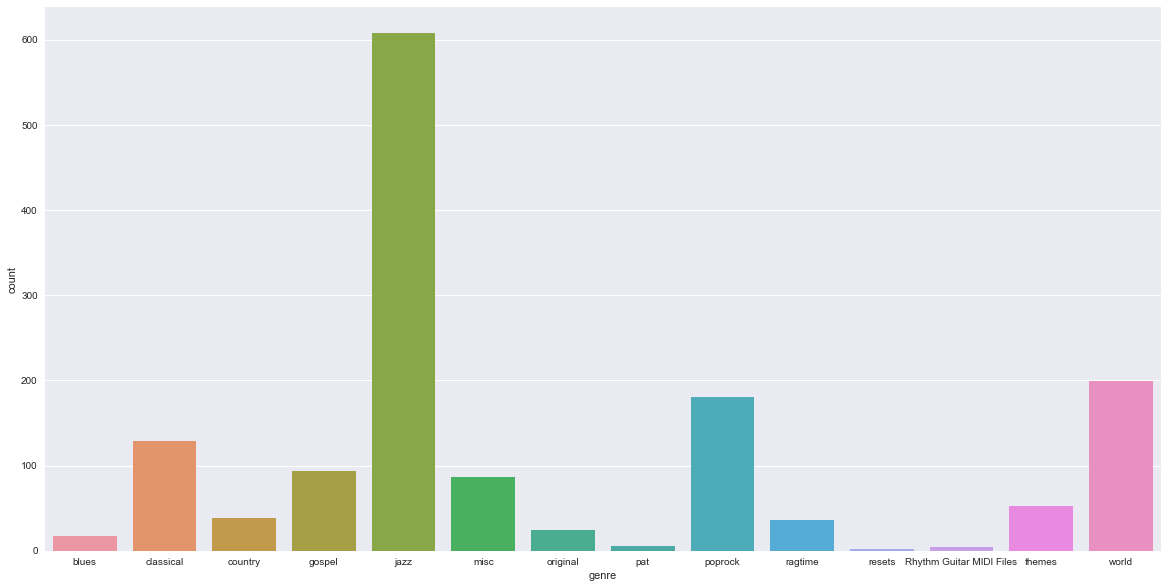

In [7]:
sns.set(style="darkgrid")

fig, ax1 = pyplot.subplots(figsize=(20, 10))
ax1 = sns.countplot(x="genre", data=df)

#### Comments on the repartition
The strikingly big bias toward jazz in this collection is problematic. This dataset contains